<a href="https://colab.research.google.com/github/kschoi93/AI/blob/master/%EC%8B%A4%EC%8A%B51_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%ED%95%99%EC%8A%B5%EC%9D%98_%EC%98%88%EC%8B%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [2]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.2, factor=0.3)

In [3]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))

In [4]:
print(x_data.shape, y_data.shape)

torch.Size([500, 2]) torch.Size([500, 1])


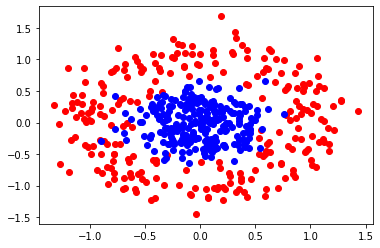

In [5]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
    plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')

scatter_plot()

In [6]:
class Model(nn.Module):
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)

    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x

    def predict(self, x):
        return 1 if self.forward(x) >= 0.5 else 0

In [7]:
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.2905,  0.5091],
        [-0.6326,  0.3917],
        [ 0.6799, -0.6612],
        [-0.5600,  0.4698]], requires_grad=True), Parameter containing:
tensor([-0.5374,  0.1889, -0.1918,  0.2031], requires_grad=True), Parameter containing:
tensor([[-0.4096, -0.1039,  0.0419, -0.1964]], requires_grad=True), Parameter containing:
tensor([0.1932], requires_grad=True)]


In [8]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [9]:
epochs = 1000
losses = []

for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)

    print("epochs:",i, "loss:", loss.item())

    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epochs: 0 loss: 0.6943923830986023
epochs: 1 loss: 0.6936458349227905
epochs: 2 loss: 0.6931501030921936
epochs: 3 loss: 0.6928898692131042
epochs: 4 loss: 0.6928225159645081
epochs: 5 loss: 0.6928708553314209
epochs: 6 loss: 0.6929452419281006
epochs: 7 loss: 0.6929811835289001
epochs: 8 loss: 0.6929551362991333
epochs: 9 loss: 0.6928743720054626
epochs: 10 loss: 0.6927605271339417
epochs: 11 loss: 0.6926376223564148
epochs: 12 loss: 0.6925258040428162
epochs: 13 loss: 0.6924380660057068
epochs: 14 loss: 0.6923784613609314
epochs: 15 loss: 0.6923430562019348
epochs: 16 loss: 0.6923215389251709
epochs: 17 loss: 0.6923013925552368
epochs: 18 loss: 0.6922716498374939
epochs: 19 loss: 0.6922261714935303
epochs: 20 loss: 0.6921643614768982
epochs: 21 loss: 0.692089855670929
epochs: 22 loss: 0.6920090317726135
epochs: 23 loss: 0.6919281482696533
epochs: 24 loss: 0.6918518543243408
epochs: 25 loss: 0.6917821764945984
epochs: 26 loss: 0.6917179822921753
epochs: 27 loss: 0.6916558742523193
epo

In [11]:
print(len(losses))

1000


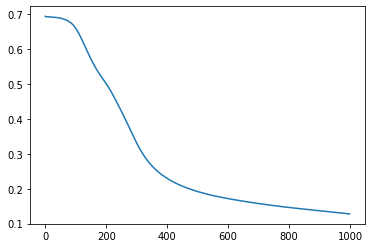

In [13]:
plt.plot(range(epochs), losses)